#  추가실습 : CNN Fashion MNIST

* 본 파일은 GPU 런타임으로 연결됩니다.
* 경우에 따라서는 GPU 연결이 원할하지 않을 수도 있습니다.

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![fashion class](https://user-images.githubusercontent.com/60168331/117663987-35e42e00-b1dc-11eb-88c7-64db3b4fbff0.png)

In [3]:
# 케라스 데이터셋으로 부터 fashion_mnist 불러오기
(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2 데이터 살펴보기

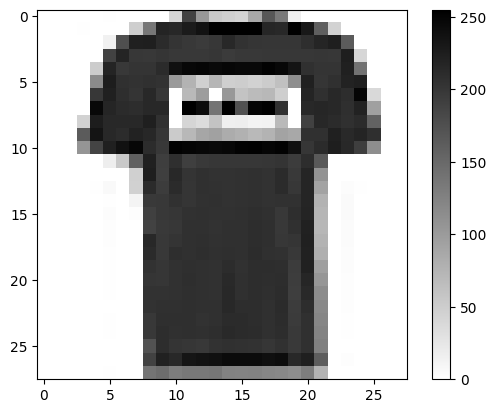

In [6]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 1

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

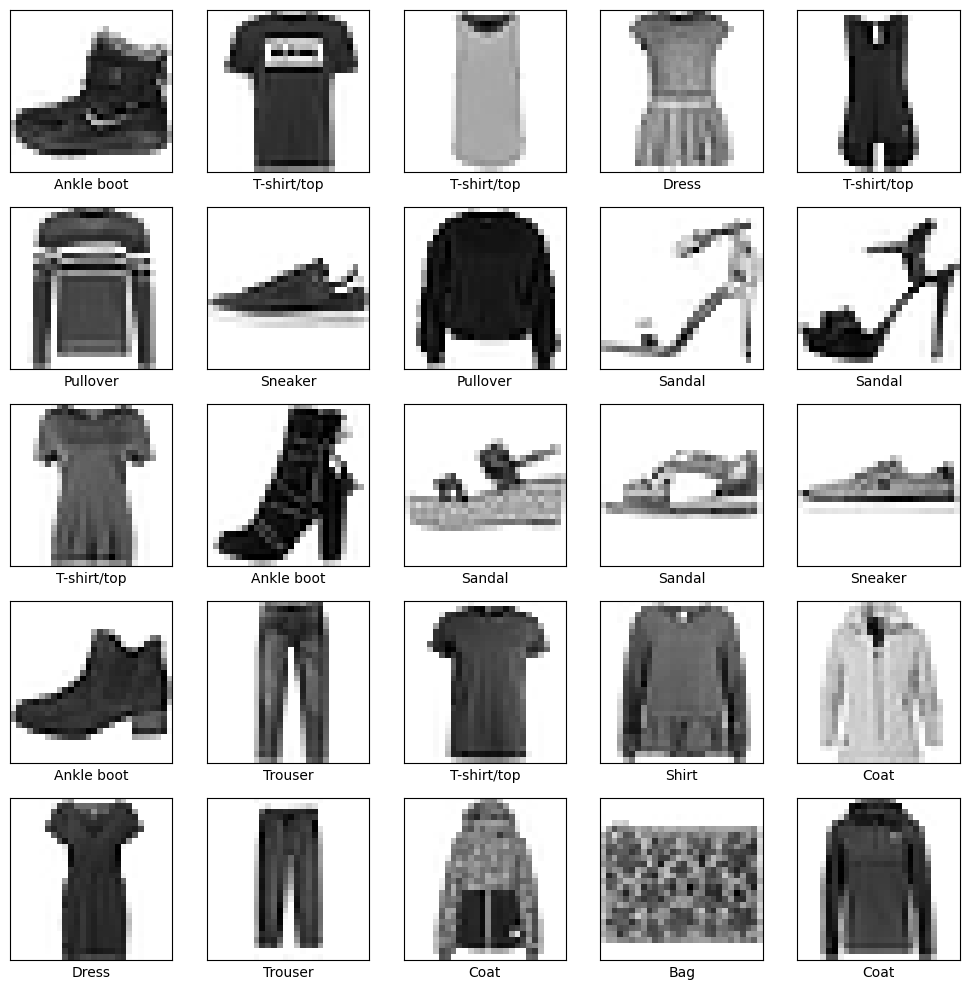

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

* CNN은 3차원 구조의 이미지(데이터셋은 4차원)를 입력해야 합니다.(input_shape)

In [8]:
x_train.shape, x_val.shape

((60000, 28, 28), (10000, 28, 28))

* reshape를 이용하여 다음과 같이 변환해 봅시다.
    * x_train.shape : (60000, 28, 28, 1)
    * x_val.shape : (10000, 28, 28, 1)

In [9]:
x_train = x_train.reshape(60000,28,28,1)
x_val = x_val.reshape(10000,28,28,1)

* Scaling : Min-Max
    * 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
    * x_train, x_test를 그냥 255로 나누면 됨

In [10]:
x_train = x_train / 255.
x_test = x_val / 255.

## 4.CNN 모델링

* 아래 그림의 구조대로 모델을 설계하고 학습해 봅시다.
* learning_rate = 0.0001

![](https://github.com/DA4BAM/image/blob/main/cnn_mnist3.png?raw=true)

In [11]:
clear_session()

model = Sequential([Input(shape = (28, 28, 1)),
                    Conv2D(32, kernel_size=3, input_shape=(28,28,1), padding='same', activation ='relu'), # strides = 1 기본값
                    MaxPooling2D(pool_size = 2),  # strides = pool_size 기본값
                    Conv2D(64, kernel_size = 3, padding='same', activation = 'relu'),
                    MaxPooling2D(pool_size = 2),
                    Flatten(),
                    Dense(128, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 10,
                    validation_split=0.2).history

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.9224 - val_loss: 0.4585
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.4291 - val_loss: 0.3981
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3769 - val_loss: 0.3739
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3458 - val_loss: 0.3386
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.3149 - val_loss: 0.3283
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.3053 - val_loss: 0.3046
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.2882 - val_loss: 0.3140
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2693 - val_loss: 0.2832
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2598 - val_loss: 0.2774
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2530 - val_loss: 0.2612


* 학습결과 그래프

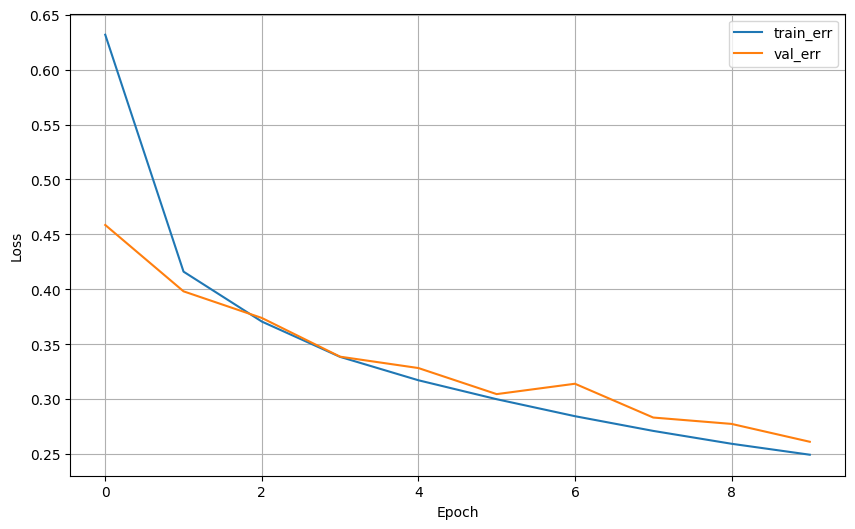

In [13]:
dl_history_plot(history)

* 예측 및 평가

In [14]:
pred = model.predict(x_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [15]:
pred_1 = pred.argmax(axis=1)

In [16]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.8684
------------------------------------------------------------
[[777   5  15  12  17   0 158   0  16   0]
 [  0 986   0   2   9   0   1   0   2   0]
 [ 13   2 680   3 222   0  70   0  10   0]
 [  6  54  10 778  95   0  54   0   3   0]
 [  0   2  10   4 963   0  20   0   1   0]
 [  0   0   0   0   0 978   1  10   1  10]
 [ 72   6  39  12 190   0 661   0  20   0]
 [  0   0   0   0   0  41   0 912   1  46]
 [  4   1   0   1   6   4   0   2 982   0]
 [  0   0   0   0   0   7   0  25   1 967]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1000
           1       0.93      0.99      0.96      1000
           2       0.90      0.68      0.78      1000
           3       0.96      0.78      0.86      1000
           4       0.64      0.96      0.77      1000
           5       0.95      0.98      0.96      1000
           6       0.68      0.66      0.67      1000
       

나만의 모델 생성


In [33]:
from tensorflow.keras.layers import Dropout, BatchNormalization

In [44]:
clear_session()

model = Sequential([Input(shape = (28, 28, 1)),
                    Conv2D(64, kernel_size=3, input_shape=(28,28,1), padding='same', activation ='relu'), # strides = 1 기본값
                    MaxPooling2D(pool_size = 2),  # strides = pool_size 기본값
                    Conv2D(128, kernel_size = 3, padding='same', activation = 'relu'),
                    MaxPooling2D(pool_size = 2),
                    Conv2D(256, kernel_size = 3, padding='same', activation = 'relu'),
                    MaxPooling2D(pool_size = 2),
                    Conv2D(512, kernel_size = 3, padding='same', activation = 'relu'),
                    MaxPooling2D(pool_size = 2),
                    Flatten(),
                    Dense(512, activation = 'relu'),
                    Dense(256, activation = 'relu'),
                    Dense(128, activation = 'relu'),
                    Dense(64, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])
# # 복잡한 CNN 모델 정의
# model = Sequential([
#     # Convolutional Block 1
#     Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     BatchNormalization(),
#     Conv2D(64, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),
#     Dropout(0.3),

#     # Convolutional Block 2
#     Conv2D(128, (3, 3), activation='relu'),
#     BatchNormalization(),
#     Conv2D(128, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),
#     Dropout(0.4),

#     # Convolutional Block 3
#     Conv2D(256, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),
#     Dropout(0.5),

#     # Fully Connected Layers
#     Flatten(),
#     Dense(512, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(256, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(10, activation='softmax')  # 클래스 수에 맞춰 출력층 구성
# ])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,985,610 (7.57 MB)

 Trainable params: 1,985,610 (7.57 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# 93% 모델
clear_session()
dr = 0.2

model = Sequential([Input(shape = (28, 28, 1)),
                    Conv2D(64, kernel_size=3, padding='same', activation ='relu'),
                    MaxPooling2D(pool_size = 2),
                    Dropout(dr),

                    Conv2D(128, kernel_size = 3, padding='same', activation = 'relu'),
                    MaxPooling2D(pool_size = 2),
                    Dropout(dr),

                    Conv2D(256, kernel_size = 3, padding='same', activation = 'relu'),
                    MaxPooling2D(pool_size = 2),
                    Dropout(dr),

                    Flatten(),
                    Dense(512, activation = 'relu'),
                    Dropout(dr),
                    Dense(128, activation = 'relu'),
                    Dropout(dr),
                    Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,616,778 (6.17 MB)

 Trainable params: 1,616,778 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.7306 - val_loss: 0.3118
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 0.3279 - val_loss: 0.2730
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2837 - val_loss: 0.2570
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.2540 - val_loss: 0.2388
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.2345 - val_loss: 0.2230
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.2082 - val_loss: 0.2236
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2094 - val_loss: 0.2232
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.1934 - val_loss: 0.2211
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.1854 - val_loss: 0.2140
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.1812 - val_loss: 0.2180


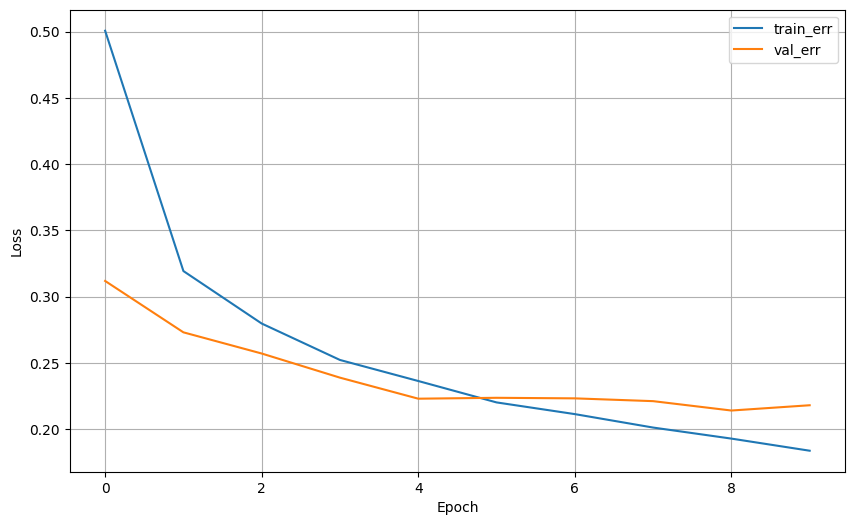

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.8158
------------------------------------------------------------
[[727   2  27   3   3   0 214   0  24   0]
 [  4 973   1   6   4   0   4   0   8   0]
 [ 14   1 763   4  65   0 137   0  16   0]
 [ 35  57  13 630  42   1 136   0  86   0]
 [  0   0  64   8 810   0  99   0  19   0]
 [  0   0   0   0   0 891   0   7 101   1]
 [ 53   3  45   2  91   0 786   0  20   0]
 [  1   0   1   0   0  41   0 754 176  27]
 [  4   1   1   3   3   1  21   0 966   0]
 [  9   0   2   3   2  30   7  21  68 858]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1000
           1       0.94      0.97      0.96      1000
           2       0.83      0.76      0.80      1000
           3       0.96      0.63      0.76      1000
           4       0.79      0.81      0.80      1000
           5       0.92      0.89      0.91      1000
           6       0

In [58]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')
# 2. 학습
history = model.fit(x_train, y_train, epochs = 10, validation_split=0.2).history
# 3. 학습 결과 그래프
dl_history_plot(history)
# 4. 예측 및 평가
pred = model.predict(x_val)

pred = pred.argmax(axis=1)
print(accuracy_score(y_val,pred))
print('-'*60)
print(confusion_matrix(y_val, pred))
print('-'*60)
print(classification_report(y_val, pred))

## 5.틀린그림 찾아보기
위 모델의 결과에서 틀린 그림을 살펴 봅시다.

In [46]:
idx = (y_val != pred)
x_val_wr = x_val[idx]
y_val_wr = y_val[idx]
pred_wr = pred[idx]

x_val_wr = x_val_wr.reshape(-1,28,28)
print(x_val_wr.shape)

(1380, 28, 28)


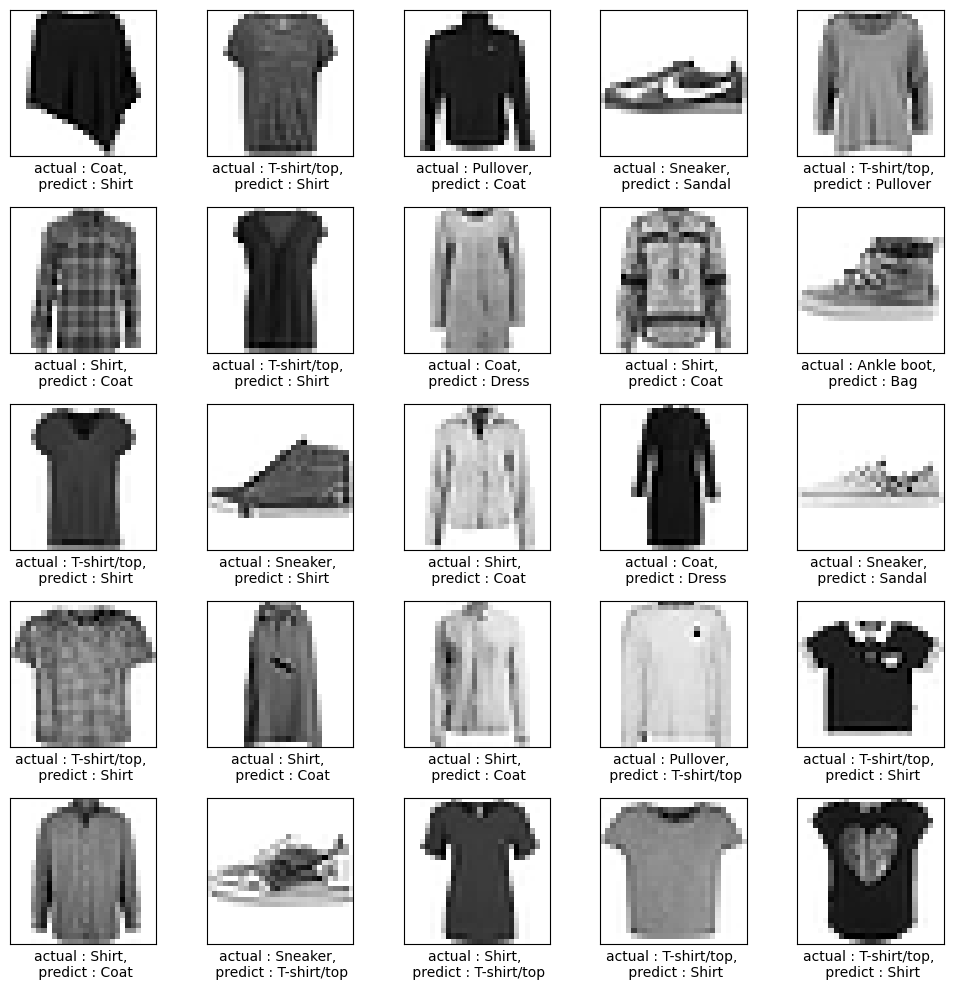

In [47]:
idx = rd.sample(range(x_val_wr.shape[0]),25)
x_temp = x_val_wr[idx]
y_temp = y_val_wr[idx]
p_temp = pred_wr[idx]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_temp[i], cmap=plt.cm.binary)
    plt.xlabel(f'actual : {class_names[y_temp[i]]}, \n predict : {class_names[p_temp[i]]}')
plt.tight_layout()
plt.show()

## 6.손으로 그린 그림으로 예측해 봅시다.

In [48]:
import cv2
from google.colab.patches import cv2_imshow

* 그림판에서 손으로 그린 그림을 업로드 합니다.

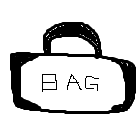

(140, 140)


In [53]:
# 파일 열기
img = cv2.imread('bag.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
print(img.shape)

In [54]:
# 크기 조절하기
img = cv2.resize(255-img, (28, 28))
print(img.shape)
cv2_imshow(img)

(28, 28)


In [55]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 223,
        255, 255, 255, 223,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 143,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   8,
          0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,
          0,   0,   0,   0,   0, 247, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 255, 255, 255,   0,   0,   0, 255,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0, 255, 255, 255, 255, 255, 167,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,
          0,   0],
       [  0,   0, 255, 255, 255,   8,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        104,   0],
       [  0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,
        255,   0],
       [  0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 255,
        255,   0],
       [  0,   0, 255, 255,   0,   0,   0,   0, 255,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0, 255,
        255,   0],
       [  0,   0, 255, 255,   0,   0,   0,   0, 255, 255, 255,   0,   0,
          0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255,   0],
       [  0,   0, 255, 255,   0,   0,   0,   0, 255,   0,   0,   0,   0,
        255,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0, 255,
        255,   0],
       [  0,   0, 247, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255,   0],
       [  0,   0,   0, 255, 104,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255,   0],
       [  0,   0,   0, 255, 255, 255,  96,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255,   0],
       [  0,   0,   0, 204, 255, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 247, 255,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   8, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [56]:
test_num = img.reshape(1,28,28,1) /255
pred = model.predict(test_num)
pred_1 = pred.argmax(axis=1)
print(class_names[pred_1[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Bag
